<a href="https://www.kaggle.com/code/mahjabeenqamar1/ukraine-russia-war-twitter?scriptVersionId=92478793" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# The Dataset We are use in Ukraine_Russia_War and Sentiment Analysis in machine learning (NLP).
This Python Environment Comes With Many Helpful Analytical Libraries Installed


In [1]:
# IMPORTS THE LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
# ignoring all the warnings
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
#READ THE DATA
df = pd.read_csv('../input/russia-vs-ukraine-tweets-datasetdaily-updated/filename.csv')
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1512297138293813250,1512297138293813250,2022-04-08 05:11:49 UTC,2022-04-08,05:11:49,0,47850843,9newsperth,9News Perth,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1512297136989343750,1512297136989343750,2022-04-08 05:11:49 UTC,2022-04-08,05:11:49,0,1206719018058633216,alateralis,AudaxLateralis,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1512297133629587459,1511391335831461894,2022-04-08 05:11:48 UTC,2022-04-08,05:11:48,0,3306321,maziak,maziak,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'IanGianni', 'name': 'Ian Gia...",NaN,NaN,NaN,NaN
3,1512297132820152321,1512297132820152321,2022-04-08 05:11:48 UTC,2022-04-08,05:11:48,0,1502704742228713480,phirigerard,Gerard Mapanga Phiri,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1512297132346253319,1512297132346253319,2022-04-08 05:11:48 UTC,2022-04-08,05:11:48,0,1485039326090215426,investincretire,"Investments, Startups, Retirement, and Travel",NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [3]:
#SHOE THIS COLUMNS NAMES
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [4]:
#GET THE THREE COLUMNS
df = df[["username", "tweet", "language"]]

In [5]:
#SHOW THIS NULL VALUES IN DATE_SET
df.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of        username  tweet  language
0         False  False     False
1         False  False     False
2         False  False     False
3         False  False     False
4         False  False     False
...         ...    ...       ...
10004     False  False     False
10005     False  False     False
10006     False  False     False
10007     False  False     False
10008     False  False     False

[10009 rows x 3 columns]>

In [6]:
#CHECK DUPLICATE VALUS AND REMOVE THEM FROM DATA_SET
df.drop_duplicates().any

<bound method NDFrame._add_numeric_operations.<locals>.any of               username                                              tweet  \
0           9newsperth  Ukrainian President Volodymyr Zelenskyy has sa...   
1           alateralis  Byron King, a geologist and a former US naval ...   
2               maziak  @IanGianni @sue_pfh @Nishtiblue “The United Ki...   
3          phirigerard  Russia will keep on fighting in Ukraine althou...   
4      investincretire  1- Still think, we should opt for peace by hav...   
...                ...                                                ...   
10004     theotherlars  @BBCWorld Take him to the border of Poland / U...   
10005        gld301218  It is both sobering and instructive to read  P...   
10006    zoarmilitante  @_Fairlyloko @gohanbrasileiro @pudimzin99 @Geo...   
10007      sashamybird  @kylegriffin1 Shld @mattgaetz @RepMTG @RepThom...   
10008      admiral1172  @IAPonomarenko Keep hammering at them Ukraina....   

      languag

In [7]:
# COUNT THE VALUE OF LANUAGE COLUMN
df["language"].value_counts()

en     8855
it      301
pt      200
und     171
in       86
ru       74
hi       53
ja       34
es       27
th       24
fr       22
fi       20
zh       19
ta       16
ca       13
tl       12
ro       10
de        9
pl        9
bn        7
uk        6
cs        5
mr        4
ur        4
tr        4
ar        3
gu        3
sv        2
kn        2
nl        2
te        2
el        2
ml        1
or        1
sr        1
lv        1
pa        1
hu        1
ko        1
et        1
Name: language, dtype: int64

As a result, English is used in the majority of tweets. Let us prepare this data for sentiment analysis. The following links, punctuation, symbols, and other linguistic issues will be removed from the tweets:


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stemmers = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

In [10]:
def clean(text_word):
    text_word = str(text_word).lower()
    text_word = re.sub('\[.*?\]', '', text_word)
    text_word = re.sub('https?://\S+|www\.\S+', '', text_word)
    text_word = re.sub('<.*?>+', '', text_word)
    text_word = re.sub('[%s]' % re.escape(string.punctuation), '', text_word)
    text_word = re.sub('\n', '', text_word)
    text_word = re.sub('\w*\d\w*', '', text_word)
    text_word = [word for word in text_word.split(' ') if word not in stopword]
    text_word=" ".join(text_word)
    text_word = [stemmers.stem(word) for word in text_word.split(' ')]
    text_word=" ".join(text_word)
    return text_word
df["tweet"] = df["tweet"].apply(clean)

Take a look at the tweets' word_cloud, which shows the most frequently used words in tweets from people sharing their thoughts and updates on the Ukraine-Russia conflict:

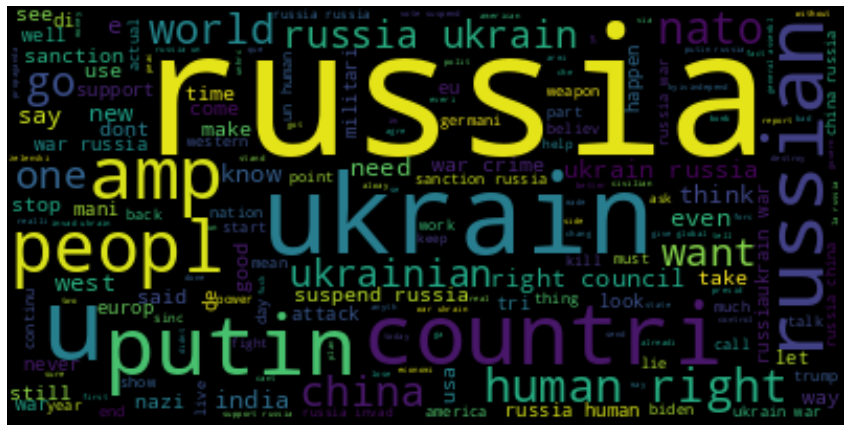

In [11]:
text_word = " ".join(i for i in df.tweet)
stopwords = set(STOPWORDS)
WC = WordCloud(stopwords=stopwords, background_color="black").generate(text_word)
plt.figure( figsize=(15,10))
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
nltk.download('vader_lexicon')
Sentie = SentimentIntensityAnalyzer()
df["Positive"] = [Sentie.polarity_scores(i)["pos"] for i in df["tweet"]]
df["Negative"] = [Sentie.polarity_scores(i)["neg"] for i in df["tweet"]]
df["Neutral"] = [Sentie.polarity_scores(i)["neu"] for i in df["tweet"]]
df = df[["tweet", "Positive", "Negative", "Neutral"]]
print(df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
                                               tweet  Positive  Negative  \
0  ukrainian presid volodymyr zelenskyy said situ...     0.089     0.172   
1  byron king geologist former us naval offic exp...     0.000     0.104   
2  iangianni suepfh nishtiblu “the unit kingdom h...     0.000     0.088   
3  russia keep fight ukrain although take huge lo...     0.094     0.498   
4   still think opt peac ukrain recogn crimea par...     0.194     0.000   

   Neutral  
0    0.739  
1    0.896  
2    0.912  
3    0.408  
4    0.806  


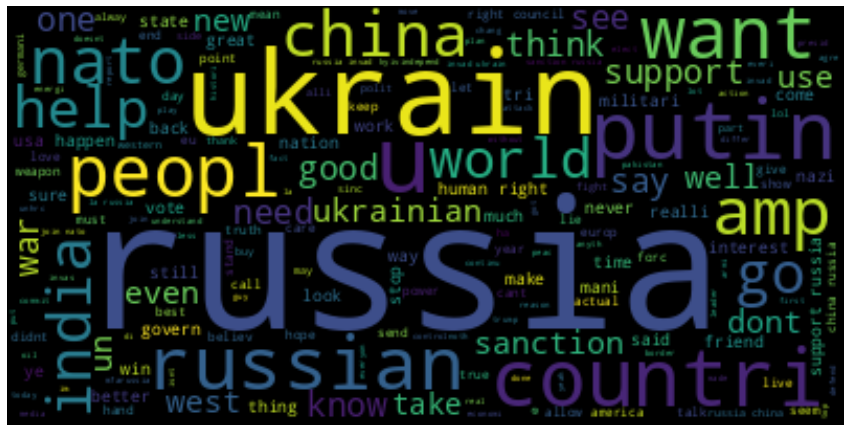

In [13]:
#CALCULATE THE SENTIMENT SCORES ARE THREE COLUMNS: POSSITIVE ,NEGATIVE ,NEUTRAL
positives =' '.join([i for i in df['tweet'][df['Positive'] > df["Negative"]]])
stopwords = set(STOPWORDS)
WC = WordCloud(stopwords=stopwords, background_color="black").generate(positives)
plt.figure( figsize=(15,10))
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.show()

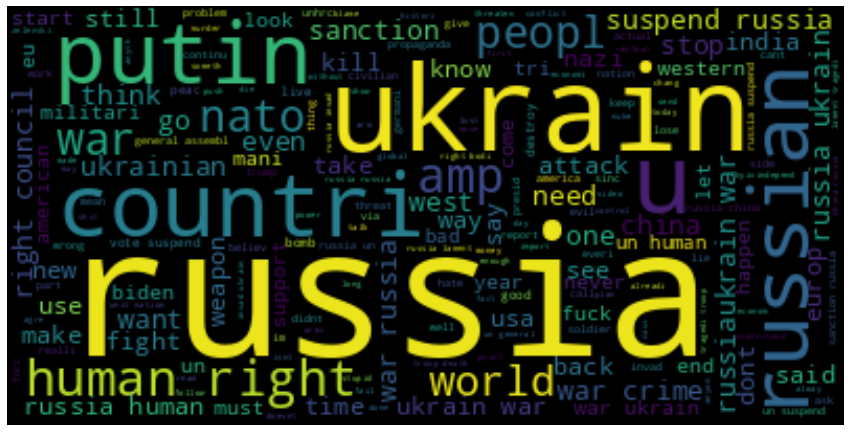

In [14]:
negatives =' '.join([i for i in df['tweet'][df['Negative'] > df["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(negatives)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()